In [1]:
%load_ext lab_black

In [2]:
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [4]:
# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.01

In [8]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
train_size = x_train.shape[0]
iter_per_epoch = max(train_size / batch_size, 1)

In [5]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [9]:
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版

    # パラメータの更新
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.8630166666666667, 0.8665
train acc, test acc | 0.8684166666666666, 0.8726
train acc, test acc | 0.8731833333333333, 0.8768
train acc, test acc | 0.8769833333333333, 0.8811
train acc, test acc | 0.8805, 0.8853
train acc, test acc | 0.88365, 0.888
train acc, test acc | 0.8855333333333333, 0.8904
train acc, test acc | 0.8885666666666666, 0.8929
train acc, test acc | 0.8905, 0.8942
train acc, test acc | 0.8928333333333334, 0.8951
train acc, test acc | 0.89435, 0.8968
train acc, test acc | 0.89595, 0.8985
train acc, test acc | 0.8972833333333333, 0.8996
train acc, test acc | 0.8987666666666667, 0.901
train acc, test acc | 0.8999333333333334, 0.902
train acc, test acc | 0.9013333333333333, 0.904
train acc, test acc | 0.9019, 0.9054


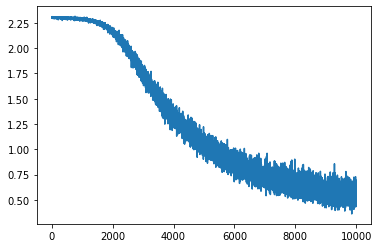

In [7]:
plt.plot(train_loss_list)